In [1]:
# EDA and plotting libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

# Scikit-Learn estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Model Evaluations
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score # Separate lines to keep everyting "Pythonic"
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

# To handle warnings 
import warnings

In [2]:
# Importing the CSV file 
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Checking to make sure the import worked
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Getting a general feel for the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# I'm curious about the number of stroke(1) v. non-stroke(0) patients in the dataset 
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

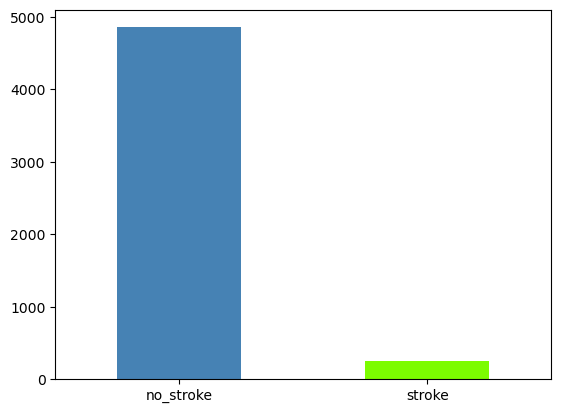

In [5]:
# Let's put this in a plot
st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

In [6]:
# Let's look at the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Checking for missing values 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Comparing gender with target (stroke) column
pd.crosstab(df.stroke, df.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


In [9]:
# Finding out which row is Other
df[df["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [10]:
# Dropping the Other value
df.drop(df[df['id'] == 56156].index, inplace=True)

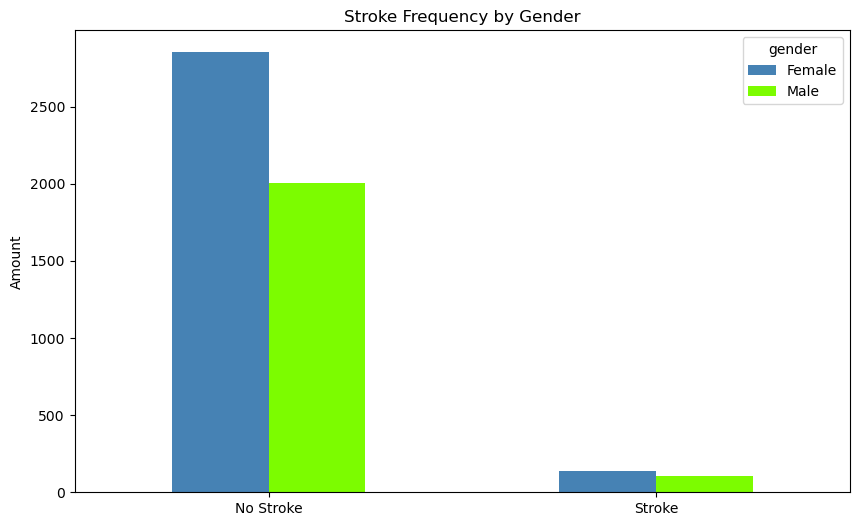

In [11]:
# Let's visualize the gender crosstab from above 
pd.crosstab(df.stroke, df.gender).plot(kind='bar',
                                       figsize=(10,6), 
                                       color=["steelblue","lawngreen"],
                                       rot=0)

# Styling
plt.title("Stroke Frequency by Gender")
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])
plt.xlabel(None)
plt.ylabel("Amount");

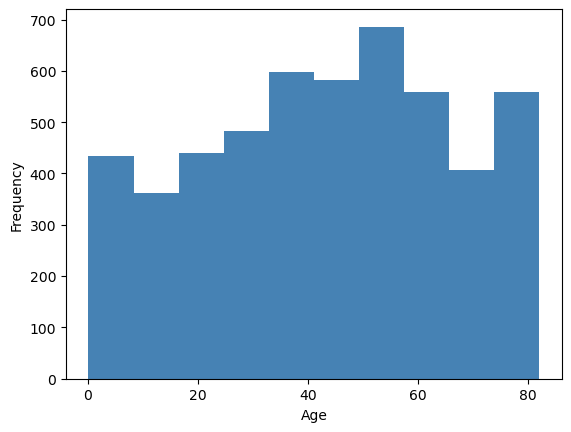

In [12]:
# Let's look at this distribution by ages 
df["age"].plot.hist(color="steelblue")
plt.xlabel("Age");

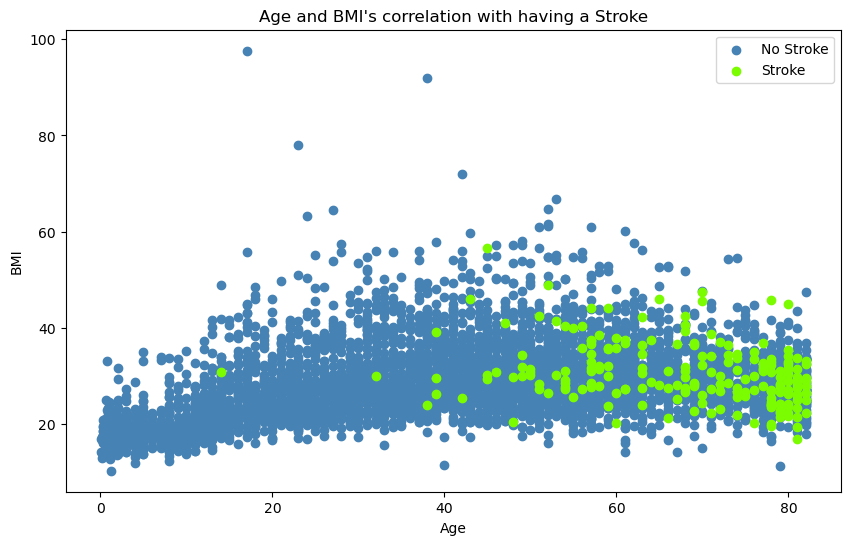

In [13]:
plt.figure(figsize=(10,6))

# Ages and BMI for people who haven't had a stroke
plt.scatter(df.age[df.stroke==0], 
            df.bmi[df.stroke==0],
            c="steelblue")

# Ages and BMI for people who have had a stroke
plt.scatter(df.age[df.stroke==1], 
            df.bmi[df.stroke==1],
            c="lawngreen")

# Styling
plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);


In [14]:
# Looking at the other columns in the dataframe to decide what to explore next
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

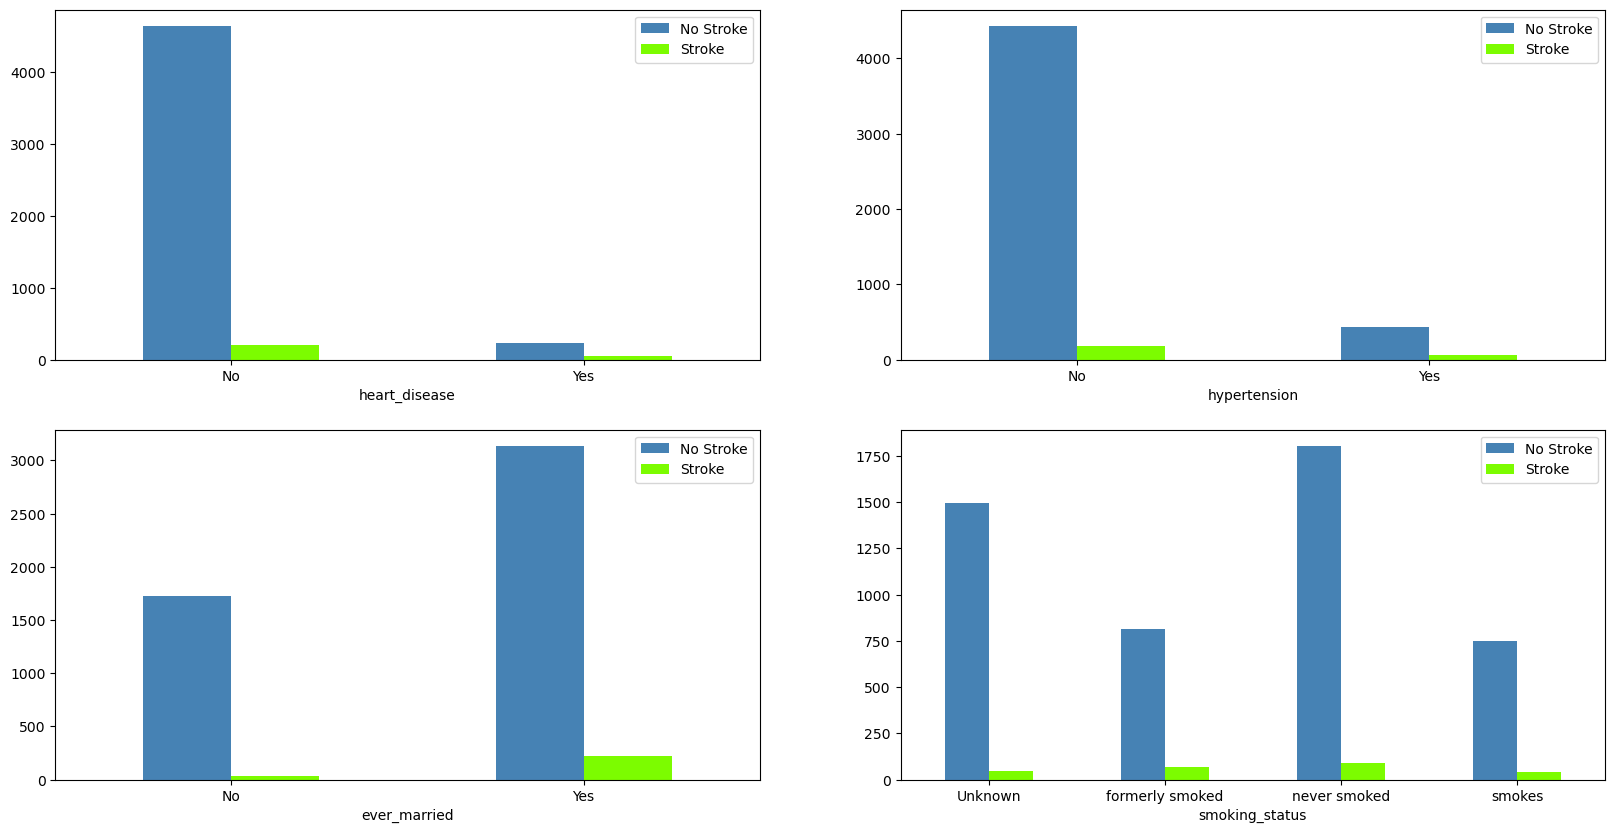

In [15]:
# Creating some crosstab info for some of the remaining columns 
ct1 = pd.crosstab(df.heart_disease,df.stroke)
ct2 = pd.crosstab(df.hypertension,df.stroke)
ct3 = pd.crosstab(df.ever_married,df.stroke)
ct4 = pd.crosstab(df.smoking_status,df.stroke)

# Setting the colors
colors = ["steelblue","lawngreen"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2, 
                                          figsize=(20,10))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# Setting x labels for heart_disease and hypertension
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke']);


In [16]:
# Making our correlation matrix
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003677,0.003610,-0.001253,0.000943,0.003238,0.006430
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991
bmi,0.003238,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000


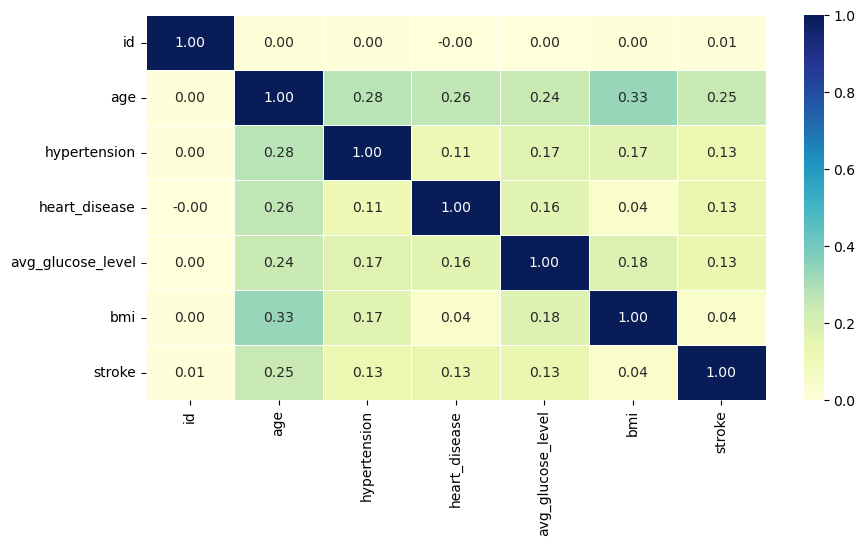

In [17]:
# Let's make the correlation matrix into a heatmap
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                );

In [18]:
# Checking out the df before I split it
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
# Noticing that I don't need the id column, so I will drop it
df.drop("id",axis=1, inplace=True)

In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
# Now let's break up our data into X and y values
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Checking the shapes
X.shape, y.shape

((5109, 10), (5109,))

In [22]:
# Creating a random seed to mix the data 
np.random.seed(88)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Splitting the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25) 

# Making sure our data was split correctly 
len(df), len(X_train), len(X_valid), len(X_test)

(5109, 3065, 1022, 1022)

In [23]:
# Looking at the number of unique, max, and min values for BMI
len(df["bmi"].value_counts()), min(df["bmi"]), max(df["bmi"])

(418, 10.3, 97.6)

In [24]:
# Checking on the mean and median values
df["bmi"].mean(), df["bmi"].median()

(28.894559902200502, 28.1)

In [25]:
# Creating a list of our split X values
data_splits = [X_train,X_valid,X_test]

# Function to fill in null values with the median of BMI data
def median_filler(split): 
    """
    Fills in any missing bmi values with the median from the set.
    """
    split["bmi"].fillna(split["bmi"].median(),inplace=True)
    
# Function to convert non-numeric values into numeric ones
def convert_category(split):
    """
    Converts non-numeric values into categories. 
    The categories are then converted to integers via the category code.
    """
    for label, content in split.items():
        if pd.api.types.is_object_dtype(content):
            # First creating categories
            split[label] = content.astype("category").cat.as_ordered()
            
            # Next accessing the corresponding codes for each category
            split[label] = pd.Categorical(content).codes
    
# Looping each X split in our list through the two functions
for split in data_splits:
    median_filler(split)
    convert_category(split)
    
    # Checking null values 
    print(f"Number of nulls: {split['bmi'].isnull().sum()}")

    # Checking datatypes
    print(f"Datatypes:\n{split.dtypes}")
    print("__________________________________")

Number of nulls: 0
Datatypes:
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
dtype: object
__________________________________
Number of nulls: 0
Datatypes:
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
dtype: object
__________________________________
Number of nulls: 0
Datatypes:
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64


In [26]:
# Generating a list of the original non-numeric objects 
objects = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Empty lists for counted values 
original_count = []
split_count =[]

# Counting the original objects, and the combined split object's values
for object in objects:
    original_count.append(df[object].value_counts())
    
    # Add each split value together
    split_add = 0
    
    for split in data_splits: 
        split_add += split[object].value_counts()
    split_count.append(split_add)

# Checking to make sure that they are equal to each other
for i, obj in enumerate(objects):
    if original_count[i].values.tolist() == split_count[i].values.tolist():
        print(f"All {obj} values were mapped correctly!")
    else:
        print(f"There was a problem with {obj}.")

All gender values were mapped correctly!
All ever_married values were mapped correctly!
All work_type values were mapped correctly!
All Residence_type values were mapped correctly!
All smoking_status values were mapped correctly!


In [27]:
# Put our models in a dictionary 
models = {"Linear SVC": LinearSVC(),
          "KNeighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()}

# Create a funciton that will fit and score the models (based on training and validation sets)
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models: a dictionary of different Scikit-Learn machine learning models 
    X_train: training features
    X_valid: validation/test features
    y_train: training labels
    y_valid: validation/test labels
    """
    # Setting a random seed 
    np.random.seed(88)
    
    # Empty dictionary to store model scores
    model_scores = {} 
    
    # Looping through each model
    for name, model in models.items():
        
        # Fit the model 
        model.fit(X_train, y_train)
        
        # Evaluate the model and append it's accuracy score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    # Return the model_scores dictionary 
    return model_scores

In [28]:
# Blocking warnings
warnings.filterwarnings("ignore")

# Running the above function and returning our score dictionary 
model_scores = fit_and_score(models,X_train,X_valid,y_train,y_valid)

model_scores

{'Linear SVC': 0.9305283757338552,
 'KNeighbors': 0.9246575342465754,
 'Random Forest': 0.9315068493150684,
 'Logistic Regression': 0.9315068493150684}

In [29]:
# Creating hyperparameter grids 

# Linear SVC grid
lin_svc_grid = {"C": np.logspace(-3, 3, 7),
                   "penalty": ["l1","l2"],
                   "loss": ["hinge","squared_hinge","modified_huber"]}

# Random Forest grid 
rand_for_grid = {"n_estimators": np.arange(10,1000,50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2,20,2)}

# Logictic Regression grid
log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty": ["l1","l2"],
                "solver": ["liblinear","lbfgs"]}

# List of grids
all_grids = [lin_svc_grid, rand_for_grid, log_reg_grid]

# Recreating our dictionary to only include models we want to use and adding grids for the models 
models = {"Linear SVC": [LinearSVC(),lin_svc_grid],
          "Random Forest": [RandomForestClassifier(),rand_for_grid],
          "Logistic Regression": [LogisticRegression(),log_reg_grid]
                                  }

In [30]:
# Tuning our models 

# Blocking all of the numerous warnings
warnings.filterwarnings("ignore")

# Creating a random seed
np.random.seed(88)

# Creating a function to run the randomizedgrid
def randomized_tune(models,X_train,y_train): 
    """
    Randomly chooses hyperparameters from the grid and fits them to a model.
    Returns the best hyperparameters.
    """ 
    # Empty dictionary for trained(fit) models 
    rs_models ={}
    
    for name, model in models.items(): 
        
        # Running RandomizedSearch Cross Validation on each model using a random subsect of given hyperparameters 
        rs_model = RandomizedSearchCV(model[0],
                                      param_distributions=model[1],
                                      cv=5, 
                                      n_iter=20,
                                      verbose=0)
        rs_model.fit(X_train,y_train)
        rs_models[name]=rs_model
    
    return rs_models

# Running our models through the Randomized tuning
rs_models = randomized_tune(models,X_train,y_train)

# Returning the new scores 
for name, model in rs_models.items():
    print(f"These are the best parameters found for {name}:\n{model.best_params_}")
    print(f"Score after using best hyperparameters:\n{name}:{model.score(X_valid,y_valid)}")
    print("---------------------")

These are the best parameters found for Linear SVC:
{'penalty': 'l2', 'loss': 'squared_hinge', 'C': 1000.0}
Score after using best hyperparameters:
Linear SVC:0.9305283757338552
---------------------
These are the best parameters found for Random Forest:
{'n_estimators': 860, 'min_samples_split': 18, 'max_depth': 3}
Score after using best hyperparameters:
Random Forest:0.9305283757338552
---------------------
These are the best parameters found for Logistic Regression:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.23357214690901212}
Score after using best hyperparameters:
Logistic Regression:0.9305283757338552
---------------------


In [31]:
# Baseline model scores
print("Baseline Scores:")
model_scores

Baseline Scores:


{'Linear SVC': 0.9305283757338552,
 'KNeighbors': 0.9246575342465754,
 'Random Forest': 0.9315068493150684,
 'Logistic Regression': 0.9315068493150684}

In [32]:
# Updating our log_reg_grid for a more exhaustive search 
log_reg_grid = {"C": np.logspace(-4,4,30),
                "penalty": ["l1","l2"],
                "solver": ["liblinear","lbfgs","sag"]}

# Using GridSearch
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5)

# Fitting our model
gs_log_reg.fit(X_train, y_train)

# Results
print(f"Best Parameters for Log Reg:\n{gs_log_reg.best_params_}")
print(f"Grid Search score Log Reg:\n{gs_log_reg.score(X_valid,y_valid)}")
print(f"Baseline score for Log Reg:\n{model_scores['Logistic Regression']}")

Best Parameters for Log Reg:
{'C': 0.7278953843983146, 'penalty': 'l2', 'solver': 'lbfgs'}
Grid Search score Log Reg:
0.9295499021526419
Baseline score for Log Reg:
0.9315068493150684


In [33]:
# Revisiting our dictionary
models = {"Linear SVC": LinearSVC(),
          "KNeighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()}

# Calling our function we made to test the data earlier
test_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

test_scores

{'Linear SVC': 0.9657534246575342,
 'KNeighbors': 0.961839530332681,
 'Random Forest': 0.9628180039138943,
 'Logistic Regression': 0.9637964774951077}

In [34]:
# Instantiating a separate Linear SVC class
clf = LinearSVC()

# Fitting the model
clf.fit(X_train,y_train)

# Scoring it to make sure it matches above
clf.score(X_test,y_test)

0.9657534246575342

In [35]:
# Making predictions with our top model 
y_preds = clf.predict(X_test)

# What the machine predicted for the target values
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

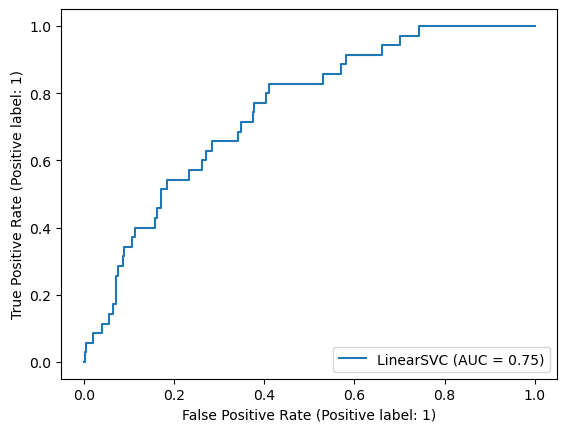

In [36]:
# ROC curve and AUC 
plot_roc_curve(clf,X_test,y_test);

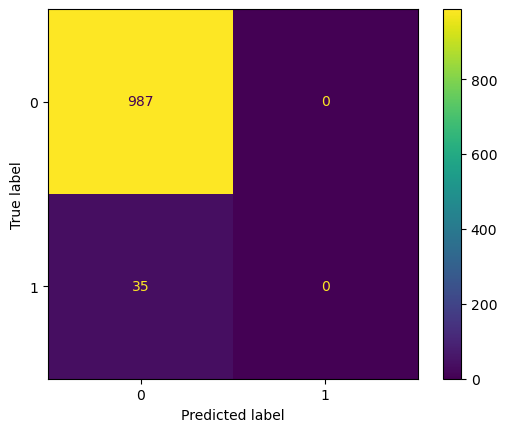

In [37]:
# Let's check out the confusion matrix 
plot_confusion_matrix(clf,X_test,y_test)

In [38]:
# Classification Report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       987
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.97      0.95      1022



In [39]:
# Creating a function to score precision, recall, and f1 scores with cross validation 
metrics = ["precision","recall","f1"]

def cv_scores(metrics): 
    """
    Performs cross validation on the data and returns the mean score.
    """
    for metric in metrics:
        scores = cross_val_score(clf, X, y, cv=5, scoring=metric)
        print(f"{metric}: {scores.mean():.3f}")
        
        
cv_scores(metrics)

precision: nan
recall: nan
f1: nan


In [40]:
# Check coefficient
clf.coef_

array([[-0.02674639,  0.00589658,  0.10781624,  0.05872669, -0.09386635,
         0.01985006, -0.00661702, -0.00106318, -0.00206701, -0.00781206]])

In [41]:
# Mapping coefficients to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'gender': -0.026746392173944384,
 'age': 0.005896578006243852,
 'hypertension': 0.10781623599036627,
 'heart_disease': 0.05872668926242799,
 'ever_married': -0.09386634715025659,
 'work_type': 0.019850063741275095,
 'Residence_type': -0.006617020066506198,
 'avg_glucose_level': -0.0010631773769097814,
 'bmi': -0.0020670090942745607,
 'smoking_status': -0.007812056021623362}

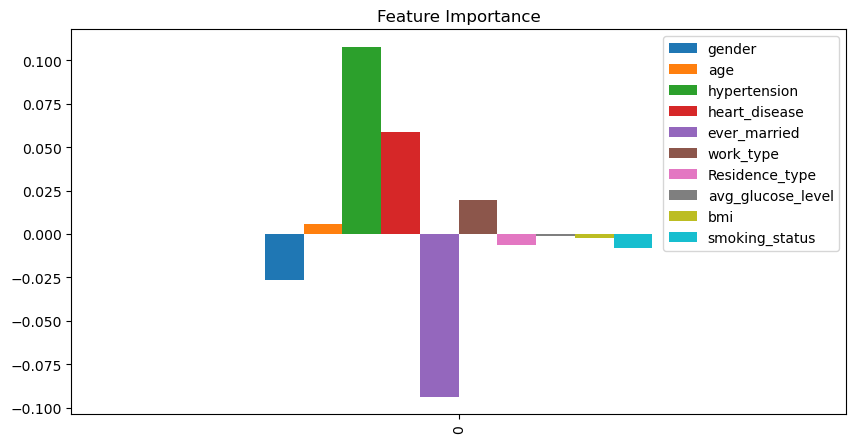

In [42]:
# Visualizing Feature Importance 
feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.plot.bar(title="Feature Importance",figsize=(10,5));

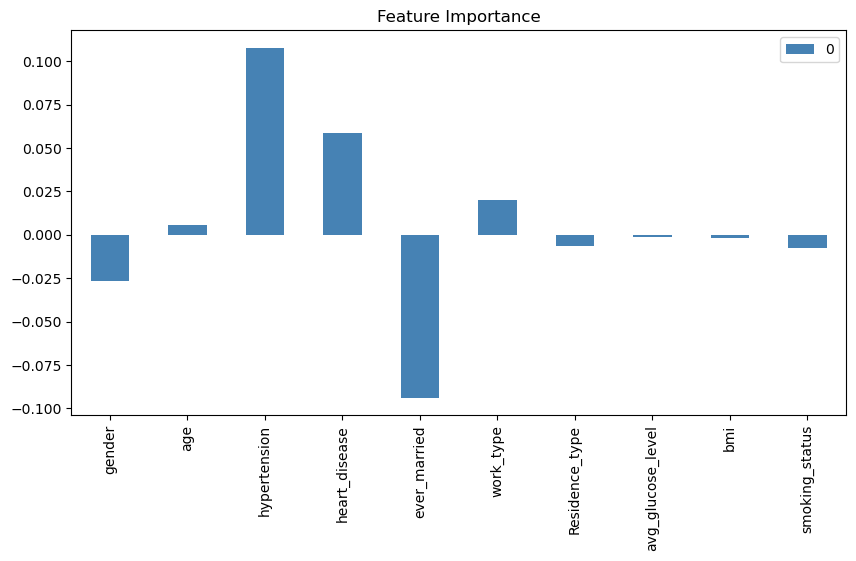

In [43]:
# Let's try transposing it 
feature_df.T.plot.bar(title="Feature Importance", figsize=(10,5), color="Steelblue");

In [44]:
# Checking on the max values for scaling above
df.avg_glucose_level.max(), df.bmi.max(), df.age.max()

(271.74, 97.6, 82.0)

In [45]:
# Instantiating the final model 
final_model = LinearSVC()

# Transforming all of the X data using our functions above
median_filler(X)
convert_category(X)

# Fitting the final model on all the data
final_model.fit(X,y)

LinearSVC()

In [46]:
# Importing joblib dump
from joblib import dump 

# Saving the final model
dump(final_model, 'final_stroke_model.joblib')

['final_stroke_model.joblib']